<a href="https://colab.research.google.com/github/alihammadbaig/ML/blob/master/Optus_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading data

In [1]:
# Mounting my Google drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [9]:
!ls "/content/gdrive/My Drive/Colab Notebooks/data/optus_case_study/"

adhoc_Interview_Prep_Widgets_Analysis_10.csv


In [0]:
# Importing the libraries
import numpy as np
import pandas as pd

**Two ways to import data **


1.   Mounting Google drive and then reading the files
2.   Using PyDrive package as shown here # The othe way to access data from Google drive is by using PyDrive as 
https://colab.research.google.com/drive/1FK6INf-TvUIJgVjIicKjK5AS9e3D5pdh#scrollTo=mNZVG_19dEGO&line=6&uniqifier=1





In [0]:
df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/data/optus_case_study/adhoc_Interview_Prep_Widgets_Analysis_10.csv")

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/open?id=1mHqU3t-mcBdfvN7InT-UT2LKD4bBU-EY'
fluff, id = link.split('=')
print (id)

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('optus_analysis.csv')  
df3 = pd.read_csv('optus_analysis.csv')

    100% |████████████████████████████████| 993kB 18.8MB/s 
1mHqU3t-mcBdfvN7InT-UT2LKD4bBU-EY


## Exploratory analysis and profiling

In [12]:
pd.options.display.float_format = '{:10,.0f}'.format
df.describe()

,FullvisitorID,visitid,Bounces,Sessions,Pages_Viewed,Seconds_Spent
count,"591,370","591,370","88,828","591,370","575,272","459,887"
mean,"4,604,303,073,569,255,936","1,552,617,294",1,1,5,463
std,"2,662,123,569,004,083,200","271,751",0,0,6,741
min,"46,318,458,441,294","1,552,132,609",1,1,1,1
25%,"2,296,636,107,343,413,504","1,552,380,436",1,1,1,55
50%,"4,599,712,832,274,812,928","1,552,610,800",1,1,3,172
75%,"6,907,440,740,499,332,096","1,552,866,166",1,1,6,538
max,"9,223,351,748,974,115,840","1,553,086,797",1,1,335,"51,003"


In [14]:
df3.head()

,FullvisitorID,visitid,Date_,Product_Category,Channel,Device,City,Bounces,Sessions,Pages_Viewed,Seconds_Spent
0,2377446927407823845,1552178767,2019-03-10,Widgets,Organic Search,desktop,Sydney,nan,1,25,"2,846"
1,7191692962248895568,1552703550,2019-03-16,Widgets,Organic Search,desktop,Sydney,nan,1,42,"9,516"
2,4938426958397847793,1552169203,2019-03-10,Widgets,Organic Search,mobile,Melbourne,nan,1,21,"1,904"
3,8125317065871044486,1552289938,2019-03-11,Widgets,Organic Search,desktop,Melbourne,nan,1,25,"2,743"
4,7191692962248895568,1552269641,2019-03-11,Widgets,Direct to Site,desktop,Sydney,nan,1,31,"3,270"


In [13]:
# rows and columns
df.shape

(591370, 11)

In [16]:
# data types
df.dtypes

FullvisitorID         int64
visitid               int64
Date_                object
Product_Category     object
Channel              object
Device               object
City                 object
Bounces             float64
Sessions              int64
Pages_Viewed        float64
Seconds_Spent       float64
dtype: object

In [15]:
# Unique visitors
df.groupby('FullvisitorID')['FullvisitorID'].nunique().count()

391706

In [30]:
# Unique sessoins 
df.groupby('visitid')['visitid'].nunique().count()

406766

In [18]:
# Total page views
df['Pages_Viewed'].sum()

2649106.0

In [24]:
# Time spent
print('Total time spent in seconds: {0}'.format(df['Seconds_Spent'].sum()))
print('Total time spent in years: {0}'.format(df['Seconds_Spent'].sum()/3600/24/30/12))


Total time spent in seconds: 213099791.0
Total time spent in years: 6.851202128343622


In [45]:
# Total views by channel

df1 = df[['Channel', 'Pages_Viewed']].copy()
print(df1.groupby('Channel')['Pages_Viewed'].count().sort_values(ascending=False))

Channel
Organic Search                  191202
Direct to Site                  105353
Paid Search                      84478
App Traffic                      59904
Display                          36539
Email                            26775
Affiliates                       18176
SMS/MMS                          15101
Pre-Install Browser Redirect     12334
External Referral                11116
Paid Social                       7212
Internal Optus Referral           4369
Short URLs                        1287
Organic Social                    1012
(Other)                            363
Video                               51
Name: Pages_Viewed, dtype: int64


Channel
Organic Search                  33.236799
Direct to Site                  18.313598
Paid Search                     14.684880
App Traffic                     10.413161
Display                          6.351604
Email                            4.654320
Affiliates                       3.159549
SMS/MMS                          2.625019
Pre-Install Browser Redirect     2.144029
External Referral                1.932303
Paid Social                      1.253668
Internal Optus Referral          0.759467
Short URLs                       0.223720
Organic Social                   0.175917
(Other)                          0.063101
Video                            0.008865
Name: Pages_Viewed, dtype: float64


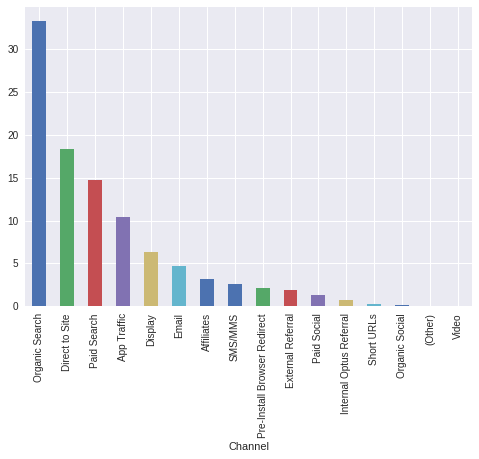

In [53]:
# Total views by channel (Pecentages)

page_view_by_channel = df.groupby(['Channel']).agg({'Pages_Viewed': 'count'})
total_page_visits = df['Pages_Viewed'].count()
page_view_by_channel = page_view_by_channel.div(total_page_visits, level='Channel') * 100
print(page_view_by_channel.Pages_Viewed.sort_values(ascending=False))

# Show as  plot
page_view_by_channel.Pages_Viewed.sort_values(ascending=False).plot(kind='bar')

Number of page views by device
Device
mobile     359895
desktop    186562
tablet      28815
Name: Pages_Viewed, dtype: int64


Percentage of page views by device
Device
mobile     62.560841
desktop    32.430224
tablet      5.008935
Name: Pages_Viewed, dtype: float64

Show in plot



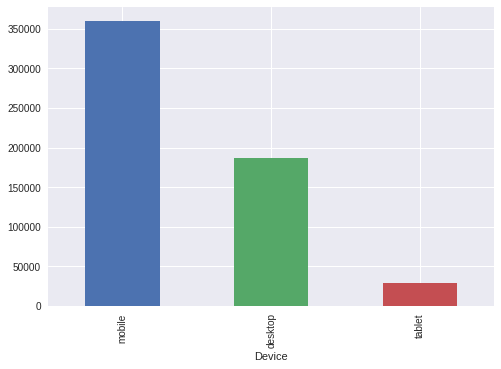

In [59]:
# Total views by device

df2 = df[['Device', 'Pages_Viewed']].copy()

# By count
pv_by_device = df2.groupby('Device')['Pages_Viewed'].count().sort_values(ascending=False)
print("Number of page views by device")
print(pv_by_device)

# By Percentage
page_view_by_device = df2.groupby(['Device']).agg({'Pages_Viewed': 'count'})
total_page_visits = df['Pages_Viewed'].count()
page_view_by_device = page_view_by_device.div(total_page_visits, level='Channel') * 100
print("\n\nPercentage of page views by device")
print(page_view_by_device.Pages_Viewed.sort_values(ascending=False))

# Show in plot
print("\nShow in plot\n")
pv_by_device.plot(kind='bar')

### "visitid"  and  "FullvisitorID" uniquely identifies a session

In [36]:
df.groupby(['FullvisitorID', 'visitid'])['visitid', 'FullvisitorID'].nunique().count()

visitid          590592
FullvisitorID    590592
dtype: int64

In [41]:
1552195580
filter1 = df['visitid'] == 1552195580
df1 = df.groupby(['FullvisitorID', 'visitid']).nunique()
df1.where(filter1).head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


IndexingError: ignored

## Top entry channels

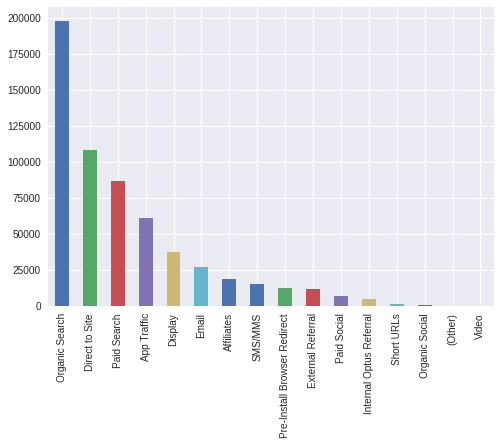

In [57]:
df['Channel'].value_counts().plot(kind='bar')

In [58]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated
